# Khám phá dữ liệu, tiền xử lý, và phân tích đơn giản

(Tiếp tục phần demo của buổi trước, dữ liệu là dữ liệu về kết quả làm bài quiz đầu tiên của lớp)

Cập nhật 08/11/2020

## Khám phá dữ liệu

In [1]:
import pandas as pd

In [2]:
quiz_df = pd.read_csv('Data/QuizGrades.csv')
quiz_df.head()

,State,Started on,Completed,Time taken,Grade/15.00,Q. 1 /1.00,Q. 2 /1.00,Q. 3 /1.00,Q. 4 /1.00,Q. 5 /1.00,Q. 6 /1.00,Q. 7 /1.00,Q. 8 /1.00,Q. 9 /1.00,Q. 10 /1.00,Q. 11 /1.00,Q. 12 /1.00,Q. 13 /1.00,Q. 14 /1.00,Q. 15 /1.00
0,Finished,10/2/2020 19:00,10/2/2020 19:49,49 mins 6 secs,12.75,1,1,1,1,1,1,0.75,0,1,1,1,1,0,1,1
1,Finished,10/2/2020 19:00,10/2/2020 19:40,40 mins 49 secs,13,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1
2,Finished,10/2/2020 19:00,10/2/2020 19:19,19 mins 45 secs,11.5,1,1,0,0,1,1,0.5,0,1,1,1,1,1,1,1
3,Finished,10/2/2020 19:01,10/2/2020 19:41,40 mins 13 secs,9.85,1,0,0,0.6,1,0,0.25,0,1,1,1,1,1,1,1
4,Finished,10/2/2020 19:01,10/2/2020 19:38,36 mins 5 secs,9.4,0,1,0,0.4,0,0,1,0,1,1,1,1,1,1,1


Bạn cũng có thể dùng phương thức `.head` để xem các dòng đầu, `.tail` để xem các dòng cuối, và `.sample` để xem các dòng ngẫu nhiên.

### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
quiz_df.shape

(98, 20)

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng (không xét dòng header) cho biết kết quả quiz của một sinh viên. Tuy nhiên, dòng cuối cùng có ý nghĩa khác: cho biết kết quả quiz trung bình. Ta nên tiền xử lý để xóa dòng này (khi cần thì dòng này có thể được tính từ các dòng còn lại).

## Tiền xử lý 

In [4]:
# Xóa đi dòng cuối: dòng có tên dòng là 97
# (Ở đây, tên dòng trùng với chỉ số vị trí; Pandas gọi tên dòng là "index") 
# (errors='ignore' để khi xóa rồi thì chạy lại cell này sẽ không bị lỗi)
quiz_df.drop(index=97, inplace=True, errors='ignore')
quiz_df.tail(3)

,State,Started on,Completed,Time taken,Grade/15.00,Q. 1 /1.00,Q. 2 /1.00,Q. 3 /1.00,Q. 4 /1.00,Q. 5 /1.00,Q. 6 /1.00,Q. 7 /1.00,Q. 8 /1.00,Q. 9 /1.00,Q. 10 /1.00,Q. 11 /1.00,Q. 12 /1.00,Q. 13 /1.00,Q. 14 /1.00,Q. 15 /1.00
94,Finished,10/2/2020 22:45,10/2/2020 22:58,13 mins 21 secs,12.25,1,1,1,1,1,1,0.25,1,1,0,1,1,1,0,1
95,Finished,10/2/2020 22:47,10/2/2020 22:59,12 mins 3 secs,7.2,1,1,0,0.2,1,0,0,0,0,0,1,1,1,1,0
96,Finished,10/2/2020 22:53,10/2/2020 22:56,2 mins 59 secs,13.05,1,1,1,0.8,1,1,0.25,1,1,1,1,1,1,0,1


## Khám phá dữ liệu 

### Dữ liệu có các dòng bị lặp không?

In [5]:
# Tạo một DataFrame để test
df = pd.DataFrame({'a': [1, 1, 1, 2, 2, 3], 'b': [10, 10, 10, 20, 20, 30]})
df

,a,b
0,1,10
1,1,10
2,1,10
3,2,20
4,2,20
5,3,30


In [6]:
# Những dòng nào bị lặp?
# (Mặc định thì phương thức .duplicated sẽ xem dòng đầu tiên trong nhóm các dòng
# giống nhau là không bị lặp; bạn có thể xem thêm document của phương thức này)
df.duplicated() 

0    False
1     True
2     True
3    False
4     True
5    False
dtype: bool

In [7]:
# Có bao nhiêu dòng bị lặp?
df.duplicated().sum()

3

In [8]:
# Bỏ đi các dòng bị lặp
df.drop_duplicates()

,a,b
0,1,10
3,2,20
5,3,30


Quay trở lại với DataFrame `quiz_df`. 

In [9]:
# Có bao nhiêu dòng bị lặp?
quiz_df.duplicated().sum()

0

### Mỗi cột có ý nghĩa gì?

In [10]:
quiz_df.head(1)

,State,Started on,Completed,Time taken,Grade/15.00,Q. 1 /1.00,Q. 2 /1.00,Q. 3 /1.00,Q. 4 /1.00,Q. 5 /1.00,Q. 6 /1.00,Q. 7 /1.00,Q. 8 /1.00,Q. 9 /1.00,Q. 10 /1.00,Q. 11 /1.00,Q. 12 /1.00,Q. 13 /1.00,Q. 14 /1.00,Q. 15 /1.00
0,Finished,10/2/2020 19:00,10/2/2020 19:49,49 mins 6 secs,12.75,1,1,1,1,1,1,0.75,0,1,1,1,1,0,1,1


- Cột "State": cho biết trạng thái làm quiz (ví dụ, nếu đã nộp bài rồi thì "State" sẽ là "Finished").
- Cột "Started on", "Completed", và "Time taken": lần lượt cho biết thời điểm bắt đầu làm quiz, thời điểm hoàn thành, và thời gian tính từ thời điểm bắt đầu làm cho tới thời điểm hoàn thành.
- Cột "Grade/15.00" và các cột "Q. 1 /1.00", ..., "Q. 15 /1.00": lần lượt cho biết điểm tổng và điểm của từng câu (có tất cả 15 câu, mỗi câu 1 điểm). 

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [11]:
quiz_df.dtypes

State          object
Started on     object
Completed      object
Time taken     object
Grade/15.00    object
Q. 1 /1.00     object
Q. 2 /1.00     object
Q. 3 /1.00     object
Q. 4 /1.00     object
Q. 5 /1.00     object
Q. 6 /1.00     object
Q. 7 /1.00     object
Q. 8 /1.00     object
Q. 9 /1.00     object
Q. 10 /1.00    object
Q. 11 /1.00    object
Q. 12 /1.00    object
Q. 13 /1.00    object
Q. 14 /1.00    object
Q. 15 /1.00    object
dtype: object

Trong Pandas, kiểu dữ liệu "object" thường ám chỉ chuỗi. Tuy nhiên, "object" có thể ám chỉ một kiểu dữ liệu bất kỳ. Bạn hình dung "object" giống như con trỏ, có thể trỏ tới một đối tượng bất kỳ. Bạn có thể đọc thêm [ở đây](https://stackoverflow.com/questions/21018654/strings-in-a-dataframe-but-dtype-is-object). 

Để biết chính xác kiểu dữ liệu "object" ám chỉ kiểu dữ liệu gì, ta có thể vào từng phần tử và dùng câu lệnh `type` để xem kiểu dữ liệu.

In [12]:
# Xem type của phần tử ở dòng có tên là 0 và cột có tên là 'Q. 1 /1.00'
type(quiz_df.loc[0, 'Q. 1 /1.00'])

str

---

Nhân đây, mình sẽ nói về cách truy xuất các phần tử trong DataFrame thông qua chỉ số vị trí dòng & cột, hoặc thông qua tên dòng & cột. 

**Truy xuất thông qua chỉ số vị trí dòng & cột**

`df.iloc[r, c]`

- `r` có thể là:
    - Một chỉ số vị trí (0, 1, 2, ...)
    - List/array/series các chỉ số vị trí
    - Slicing theo chỉ số vị trí
    - List/array các giá trị True/False (hiện tại thì `iloc` không chạy được với series True/False)
- `c` tương tự như `r`
- Dùng một chỉ số vị trí (một con số) thì kết quả sẽ bị giảm chiều
    - Nếu hoặc `r` hoặc `c` là một chỉ số vị trí (một con số) thì kết quả là series
    - Nếu cả `r` và `c` đều là một chỉ số vị trí (một con số) thì kết quả là một giá trị

**Truy xuất thông qua tên dòng & cột**

`df.loc[r, c]`

- `r` có thể là: 
    - Một tên
    - List/array/series các tên
    - Slicing theo tên (khác với slicing theo chỉ số vị trí, slicing theo tên bao gồm cả start **và end**)
    - List/array/series các giá trị True/False
- `c` tương tự như `r`
- Dùng một tên thì kết quả sẽ bị giảm chiều
    - Nếu hoặc `r` hoặc `c` là một tên thì kết quả là series
    - Nếu cả `r` và `c` đều là một tên thì kết quả là một giá trị

**Shortcut cho các truy xuất thường dùng**

`df[...]`

- `df[tên hoặc list các tên]` là shortcut của `df.loc[:, tên hoặc list các tên]`
- `df[list/array/series các giá trị True/False]` là shortcut của `df.loc[list/array/series các giá trị True/False, :]`
- `df[slicing]` là shortcut của `df.iloc[slicing, :]`

---

Quay trở lại `quiz_df` với kiểu dữ liệu hiện có của mỗi cột. Có vẻ tất cả các cột đều đang được lưu trữ dưới dạng chuỗi. Ta cần tiền xử lý để các cột có kiểu dữ liệu phù hợp để xử lý tiếp:
- Cột "State": không cần làm gì, để dạng chuỗi là hợp lý
- Cột "Started on", "Completed": chuyển về kiểu dữ liệu thời gian
- Cột "Time taken": chuyển về kiểu dữ liệu số (phút)
- Các cột còn lại ("Grade/15.00", "Q. 1 /1.00", ...): chuyển về kiểu dữ liệu số

## Tiền xử lý 

In [13]:
# Chuyển sang kiểu dữ liệu thời gian: dùng hàm pd.to_datetime
# Có thể cho tham số errors='coerce' -> nếu gặp các giá trị
# không chuyển được thì sẽ cho là NaT
# Ở đây minh họa với cột "Started on"
pd.to_datetime(quiz_df['Started on'])

0    2020-10-02 19:00:00
1    2020-10-02 19:00:00
2    2020-10-02 19:00:00
3    2020-10-02 19:01:00
4    2020-10-02 19:01:00
             ...        
92   2020-10-02 22:28:00
93   2020-10-02 22:41:00
94   2020-10-02 22:45:00
95   2020-10-02 22:47:00
96   2020-10-02 22:53:00
Name: Started on, Length: 97, dtype: datetime64[ns]

In [14]:
# Chuyển sang kiểu dữ liệu số: dùng hàm pd.to_numeric
# Trước đó: 
# - Cần replace giá trị '-' (ứng với những bạn chưa làm) 
#   bằng '0', nếu không thì sẽ xảy ra lỗi
# - HOẶC: cho tham số errors của pd.to_numeric bằng 'coerce'
#   -> những giá trị không chuyển được thì sẽ cho là NaN 
# Ở đây minh họa với cột "Grader/15.00" 

# pd.to_numeric(quiz_df['Grade/15.00'].replace('-', '0'))
pd.to_numeric(quiz_df['Grade/15.00'], errors='coerce')

0     12.75
1     13.00
2     11.50
3      9.85
4      9.40
      ...  
92    14.05
93    13.05
94    12.25
95     7.20
96    13.05
Name: Grade/15.00, Length: 97, dtype: float64

In [15]:
# Bây giờ là cột khó nhất: cột "Time taken"
# Bạn hãy chạy cell này nhiều lần để hiểu rõ hơn về cột "Time taken"
quiz_df['Time taken'].sample(10) 

87    22 mins 19 secs
48    52 mins 17 secs
93     10 mins 8 secs
37    42 mins 29 secs
94    13 mins 21 secs
52     2 mins 49 secs
9     26 mins 52 secs
10    27 mins 46 secs
73    38 mins 39 secs
96     2 mins 59 secs
Name: Time taken, dtype: object

Như vậy, cột này không chỉ có "mins" và "secs", mà có thể có cả "hour" (có thể có hoặc không có "s", tương tự với "min" và "sec"), có khi chỉ có "mins", ... Do đó, ta sẽ chuyển cột này sang phút bằng cách:
- Rút trích cột giờ (phần tử nào không rút trích được thì cho là 0)
- Rút trích cột phút (phần tử nào không rút trích được thì cho là 0)
- Rút trích cột giây (phần tử nào không rút trích được thì cho là 0)
- Sau cùng, chuyển sang cột phút bằng cách: cột giờ nhân 60 + cột phút + cột giây chia 60

In [16]:
# Minh họa rút trích cột giờ
# Khi dùng phương thức .str.extract thì bạn phải cho biết là muốn rút trích ra
# phần nào trong pattern của Regex bằng cách bọc phần đó lại trong dấu ()
# Ngoài ra: để kết quả là một Series thì bạn cho expand=False
df = quiz_df['Time taken'].str.extract(r'(\d+) hour', expand=False)
# df = df.fillna(0) # Điền NaN bằng 0
df.head(20)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14      1
15    NaN
16    NaN
17      1
18    NaN
19    NaN
Name: Time taken, dtype: object

Mình đã chuẩn bị cho bạn các thứ cần thiết rồi. Bạn hãy thử hoàn thành phần chuyển tất cả các cột trong `quiz_df` sang kiểu dữ liệu phù hợp (`quiz_df.dtypes` sẽ thay đổi).

TIẾP TỤC BUỔI TRƯỚC 

In [17]:
quiz_df.head(2)

,State,Started on,Completed,Time taken,Grade/15.00,Q. 1 /1.00,Q. 2 /1.00,Q. 3 /1.00,Q. 4 /1.00,Q. 5 /1.00,Q. 6 /1.00,Q. 7 /1.00,Q. 8 /1.00,Q. 9 /1.00,Q. 10 /1.00,Q. 11 /1.00,Q. 12 /1.00,Q. 13 /1.00,Q. 14 /1.00,Q. 15 /1.00
0,Finished,10/2/2020 19:00,10/2/2020 19:49,49 mins 6 secs,12.75,1,1,1,1,1,1,0.75,0,1,1,1,1,0,1,1
1,Finished,10/2/2020 19:00,10/2/2020 19:40,40 mins 49 secs,13,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1


In [18]:
def convert_col_dtype(col):
    if col.name in ['Started on', 'Completed']:
        return pd.to_datetime(col, errors='coerce')
    elif '/' in col.name:
        return pd.to_numeric(col, errors='coerce')
    elif col.name == 'Time taken':
        h_col = col.str.extract(r'(\d+) hour', expand=False)
        h_col = pd.to_numeric(h_col.fillna(0))
        m_col = col.str.extract(r'(\d+) min', expand=False)
        m_col = pd.to_numeric(m_col.fillna(0))
        s_col = col.str.extract(r'(\d+) sec', expand=False)
        s_col = pd.to_numeric(s_col.fillna(0))
        return h_col * 60 + m_col + s_col / 60
    return col
df = quiz_df.apply(convert_col_dtype)
quiz_df = df

In [19]:
quiz_df.head(2)

,State,Started on,Completed,Time taken,Grade/15.00,Q. 1 /1.00,Q. 2 /1.00,Q. 3 /1.00,Q. 4 /1.00,Q. 5 /1.00,Q. 6 /1.00,Q. 7 /1.00,Q. 8 /1.00,Q. 9 /1.00,Q. 10 /1.00,Q. 11 /1.00,Q. 12 /1.00,Q. 13 /1.00,Q. 14 /1.00,Q. 15 /1.00
0,Finished,2020-10-02 19:00:00,2020-10-02 19:49:00,49.100000,12.75,1.0,1.0,1.0,1.0,1.0,1.0,0.75,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
1,Finished,2020-10-02 19:00:00,2020-10-02 19:40:00,40.816667,13.00,1.0,1.0,0.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [20]:
quiz_df.dtypes

State                  object
Started on     datetime64[ns]
Completed      datetime64[ns]
Time taken            float64
Grade/15.00           float64
Q. 1 /1.00            float64
Q. 2 /1.00            float64
Q. 3 /1.00            float64
Q. 4 /1.00            float64
Q. 5 /1.00            float64
Q. 6 /1.00            float64
Q. 7 /1.00            float64
Q. 8 /1.00            float64
Q. 9 /1.00            float64
Q. 10 /1.00           float64
Q. 11 /1.00           float64
Q. 12 /1.00           float64
Q. 13 /1.00           float64
Q. 14 /1.00           float64
Q. 15 /1.00           float64
dtype: object

## Khám phá dữ liệu 

### Với mỗi cột có kiểu dữ liệu dạng số (numeric, datetime), các giá trị được phân bố như thế nào?

- Số-lần/tỉ-lệ các giá trị thiếu
- Min, 25th percentile (lower quartile), 50th percentile (median), 75th percentile (upper quartile), max. HOẶC: min, mean & standard deviation, max
- Nếu chưa đủ: vẽ histogram

In [21]:
quiz_df.head(2)

,State,Started on,Completed,Time taken,Grade/15.00,Q. 1 /1.00,Q. 2 /1.00,Q. 3 /1.00,Q. 4 /1.00,Q. 5 /1.00,Q. 6 /1.00,Q. 7 /1.00,Q. 8 /1.00,Q. 9 /1.00,Q. 10 /1.00,Q. 11 /1.00,Q. 12 /1.00,Q. 13 /1.00,Q. 14 /1.00,Q. 15 /1.00
0,Finished,2020-10-02 19:00:00,2020-10-02 19:49:00,49.100000,12.75,1.0,1.0,1.0,1.0,1.0,1.0,0.75,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
1,Finished,2020-10-02 19:00:00,2020-10-02 19:40:00,40.816667,13.00,1.0,1.0,0.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [22]:
quiz_df.describe()

,Time taken,Grade/15.00,Q. 1 /1.00,Q. 2 /1.00,Q. 3 /1.00,Q. 4 /1.00,Q. 5 /1.00,Q. 6 /1.00,Q. 7 /1.00,Q. 8 /1.00,Q. 9 /1.00,Q. 10 /1.00,Q. 11 /1.00,Q. 12 /1.00,Q. 13 /1.00,Q. 14 /1.00,Q. 15 /1.00
count,97.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,38.095704,11.875521,0.833333,0.885417,0.572917,0.779167,0.947917,0.468750,0.721354,0.520833,0.947917,0.854167,0.864583,0.979167,0.906250,0.729167,0.864583
std,24.339461,2.466139,0.374634,0.320190,0.497251,0.299444,0.223361,0.501642,0.341956,0.502188,0.223361,0.354792,0.343964,0.143576,0.293011,0.446723,0.343964
min,0.000000,4.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.683333,10.487500,1.000000,1.000000,0.000000,0.600000,1.000000,0.000000,0.500000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
50%,35.500000,12.000000,1.000000,1.000000,1.000000,0.800000,1.000000,0.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,45.266667,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,146.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Phương thức describe mô tả các cột theo các đại lượng thống kê đã được chỉ định sẵn. Mặc dù ta có thay thử thay đổi các tham số của describe, nhưng nhìn chung những gì có thể làm được vẫn khá bị giới hạn trong khuôn mẫu, không thể tùy biến theo ý của người dùng.

Để có thể mô tả các cột một cách tùy ý, thay vì dùng describe thì ta sẽ làm như sau.

In [23]:
df = quiz_df.select_dtypes(exclude='object')
def missing_ratio(s):
    return s.isna().mean() * 100
def median(df):
    return df.quantile(0.5)
def lower_quartile(df):
    return df.quantile(0.25)
def upper_quartile(df):
    return df.quantile(0.75)
# Trong phương thức agg, bạn có thể truyền vào một list các
# hàm (có thể là các hàm có sẵn hoặc các hàm tự định nghĩa)
df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max])

,Started on,Completed,Time taken,Grade/15.00,Q. 1 /1.00,Q. 2 /1.00,Q. 3 /1.00,Q. 4 /1.00,Q. 5 /1.00,Q. 6 /1.00,Q. 7 /1.00,Q. 8 /1.00,Q. 9 /1.00,Q. 10 /1.00,Q. 11 /1.00,Q. 12 /1.00,Q. 13 /1.00,Q. 14 /1.00,Q. 15 /1.00
missing_ratio,0,1.03093,0.000000,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928,1.030928
min,2020-10-02 19:00:00,2020-10-02 19:19:00,0.000000,4.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
lower_quartile,2020-10-02 19:30:00,2020-10-02 20:05:45,23.683333,10.487500,1.000000,1.000000,0.000000,0.600000,1.000000,0.000000,0.500000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
median,2020-10-02 20:02:00,2020-10-02 20:52:00,35.500000,12.000000,1.000000,1.000000,1.000000,0.800000,1.000000,0.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
upper_quartile,2020-10-02 21:05:00,2020-10-02 21:52:00,45.266667,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2020-10-02 22:53:00,2020-10-02 22:59:00,146.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Nếu chưa đủ: vẽ histogram. Dưới đây minh họa cách vẽ histogram cho cột "Grade/15.00".

In [24]:
# Các câu lệnh vẽ hình của Pandas sẽ gọi đến các
# câu lệnh vẽ hình của thư viện matplotlib
# Để tinh chỉnh các hình vẽ sau khi gọi các câu lệnh vẽ hình
# của Pandas thì ta có thể sẽ cần dùng thêm các câu lệnh của
# thư viện matplotlib
import matplotlib.pyplot as plt

In [25]:
# Đây là câu lệnh của Jupyter Notebook, để đảm bảo việc vẽ hình
# trong Notebook diễn ra suôn sẻ (chỉ cần chạy câu lệnh này 1
# lần là sẽ có hiệu ứng cho cả Notebook)
# Nếu không có câu lệnh này thì tùy thuộc vào hệ điều hành và
# phiên bản của Pandas mà có thể xảy ra các vấn đề như: hình vẽ
# pop up ra ở một cửa sổ riêng, không vẽ được, ...
%matplotlib inline

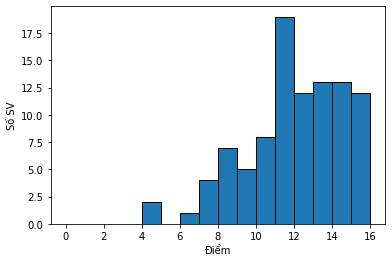

In [26]:
# Tham số bins có thể là: 
# - Một con số: Pandas sẽ hiểu đây là số lượng bin, và sẽ tự
#   động chia đều từ min đến max chừng đó bin
# - List các con số: ví dụ với list [0, 5, 10, 15] thì Pandas
#   sẽ chia làm 4 bin: [0, 5), [5, 10), [10, 15]
#   (để ý: bin cuối bao gồm cả đầu bên phải)
quiz_df['Grade/15.00'].plot.hist(bins=range(0, 17, 1), edgecolor='black')
plt.xlabel('Điểm') 
plt.ylabel('Số SV');

### Với mỗi cột có kiểu dữ liệu không phải dạng số (ở đây chủ yếu ta ám chỉ dạng categorical), các giá trị được phân bố như thế nào?

- Số-lần/tỉ-lệ các giá trị thiếu
- Số lượng các giá trị khác nhau & số-lần/tỉ-lệ xuất hiện của mỗi giá trị
- Nếu chưa đủ: vẽ bar chart

In [27]:
df = quiz_df.select_dtypes(include='object')
def value_counts(col):
    return dict(col.value_counts())
df = df.agg([missing_ratio, pd.Series.nunique, value_counts])
df

,State
missing_ratio,0
nunique,2
value_counts,"{'Finished': 96, 'Never submitted': 1}"


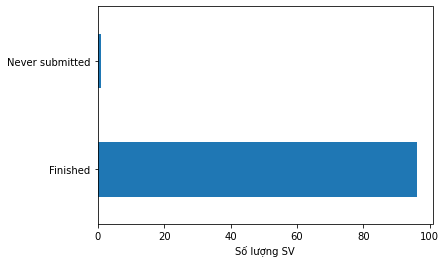

In [28]:
# Minh họa cách vẽ bar chart với cột "State"
quiz_df.State.value_counts().plot.barh()
plt.xlabel('Số lượng SV');

## Đặt câu hỏi 

Đến đây, ta đã hiểu hơn về dữ liệu. Ta hãy xem thử có các câu hỏi nào có được trả lời bằng dữ liệu này.

**Một câu hỏi có thể có là:** nhóm các bạn top 25% (có điểm $\in$ [upper quartile, max]) có đặc điểm gì so với 3 nhóm còn lại ([min, lower quartile), [lower quartile, median), [median, upper quartile))?

## Tiền xử lý

Trước khi qua bước phân tích để trả lời cho câu hỏi, ta có cần thực hiện thêm các thao tác tiền xử lý nào không? 

Ta có thể tiền xử lý bằng cách thêm cột "GradeRank" vào `quiz_df`, trong đó:
- Các bạn có điểm $\in$ [upper quartile, max] có rank 1
- Các bạn có điểm $\in$ [median, upper quartile) có rank 2
- Các bạn có điểm $\in$ [lower quartile, median) có rank 3
- Các bạn có điểm $\in$ [min, lower quartile) có rank 4

Ở đây, mình thấy ranh giới giữa bước tiền xử và phân tích khá mờ nhạt. Bạn có thể coi thao tác tiền xử lý ở trên là thuộc bước phân tích cũng được.

In [29]:
# Tính min, lower quartile, median, upper quartile, max
bins = quiz_df['Grade/15.00'].quantile([0, 0.25, 0.5, 0.75, 1])
bins

0.00     4.1500
0.25    10.4875
0.50    12.0000
0.75    14.0000
1.00    15.0000
Name: Grade/15.00, dtype: float64

In [30]:
# Rời rạc hóa cột "Grade/15.00" dựa vào biến bins đã tính
grade_rank = pd.cut(quiz_df['Grade/15.00'], bins, right=False)
grade_rank

0       [12.0, 14.0)
1       [12.0, 14.0)
2     [10.488, 12.0)
3     [4.15, 10.488)
4     [4.15, 10.488)
           ...      
92      [14.0, 15.0)
93      [12.0, 14.0)
94      [12.0, 14.0)
95    [4.15, 10.488)
96      [12.0, 14.0)
Name: Grade/15.00, Length: 97, dtype: category
Categories (4, interval[float64]): [[4.15, 10.488) < [10.488, 12.0) < [12.0, 14.0) < [14.0, 15.0)]

Trong hàm `pd.cut` ở trên, ta có thể chỉnh tham số `right=False` để mỗi bin bao gồm đầu bên trái nhưng không bao gồm đầu bên phải. Tuy nhiên, ở bin cuối ta muốn bao gồm luôn cả đầu bên phải (giá trị 15). Một cách là ta sẽ tăng giá trị của phần tử cuối trong biến `bins` lên một ít (ví dụ, 15.01).

In [31]:
# Tính min, lower quartile, median, upper quartile, max
bins = quiz_df['Grade/15.00'].quantile([0, 0.25, 0.5, 0.75, 1])
bins.iloc[-1] += 0.1
bins

0.00     4.1500
0.25    10.4875
0.50    12.0000
0.75    14.0000
1.00    15.1000
Name: Grade/15.00, dtype: float64

In [32]:
# Rời rạc hóa cột "Grade/15.00" dựa vào biến bins đã tính
grade_rank = pd.cut(quiz_df['Grade/15.00'], bins, right=False)
grade_rank

0       [12.0, 14.0)
1       [12.0, 14.0)
2     [10.488, 12.0)
3     [4.15, 10.488)
4     [4.15, 10.488)
           ...      
92      [14.0, 15.1)
93      [12.0, 14.0)
94      [12.0, 14.0)
95    [4.15, 10.488)
96      [12.0, 14.0)
Name: Grade/15.00, Length: 97, dtype: category
Categories (4, interval[float64]): [[4.15, 10.488) < [10.488, 12.0) < [12.0, 14.0) < [14.0, 15.1)]

In [33]:
# Rời rạc hóa một cột số (Series) dựa vào biến bins đã tính
# Chỉnh tham số label trong hàm pd.cut để ra kết quả như ý tưởng
# đã vạch ra ban đầu
grade_rank = pd.cut(quiz_df['Grade/15.00'], bins, right=False,
                   labels=[4, 3, 2, 1])
grade_rank

0     2
1     2
2     3
3     4
4     4
     ..
92    1
93    2
94    2
95    4
96    2
Name: Grade/15.00, Length: 97, dtype: category
Categories (4, int64): [4 < 3 < 2 < 1]

In [34]:
# Cuối cùng: thêm cột grade_rank vào quiz_df
# (Ngoài phương thức assign ở bên dưới, một cách khác là:
# quiz_df['GradeRank'] = grade_rank; tuy nhiên, một ưu điểm
# của phương thức assign là có thể làm/không-làm thay đổi quiz_df)
quiz_df = quiz_df.assign(GradeRank=grade_rank)
quiz_df.head(2)

,State,Started on,Completed,Time taken,Grade/15.00,Q. 1 /1.00,Q. 2 /1.00,Q. 3 /1.00,Q. 4 /1.00,Q. 5 /1.00,...,Q. 7 /1.00,Q. 8 /1.00,Q. 9 /1.00,Q. 10 /1.00,Q. 11 /1.00,Q. 12 /1.00,Q. 13 /1.00,Q. 14 /1.00,Q. 15 /1.00,GradeRank
0,Finished,2020-10-02 19:00:00,2020-10-02 19:49:00,49.100000,12.75,1.0,1.0,1.0,1.0,1.0,...,0.75,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,2
1,Finished,2020-10-02 19:00:00,2020-10-02 19:40:00,40.816667,13.00,1.0,1.0,0.0,1.0,1.0,...,1.00,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2


## Phân tích dữ liệu

So sánh các nhóm theo "Time taken": 

In [35]:
# Để ý: hàm median đã được định nghĩa ở trên
quiz_df.groupby('GradeRank')['Time taken'].agg([min, median, max])

,min,median,max
GradeRank,,,
4,10.766667,28.683333,90.0
3,17.633333,36.375000,115.0
2,2.983333,33.266667,88.0
1,2.816667,45.200000,146.0


Hmm... Có vẻ nhóm điểm cao (nhóm 1) bỏ nhiều thời gian để làm quiz hơn so với các nhóm còn lại (quan sát cột median).

Trong nhóm điểm cao, có bạn chỉ mất ~3 phút để hoàn thành (quan sát cột min)! Một số giả thuyết có thể có:
- Bạn này đã biết trước về Python?
- Bạn này thuộc dạng superman 😉?
- Gian lận?

Bạn có thể thử so sánh các nhóm với các tiêu chí khác như "Started on" hay "Completed".